In [1]:
import yt
import numpy as np
from astropy.table import QTable
import matplotlib.pyplot as plt

[0 1 2 3 4 5 6 7 8 9]


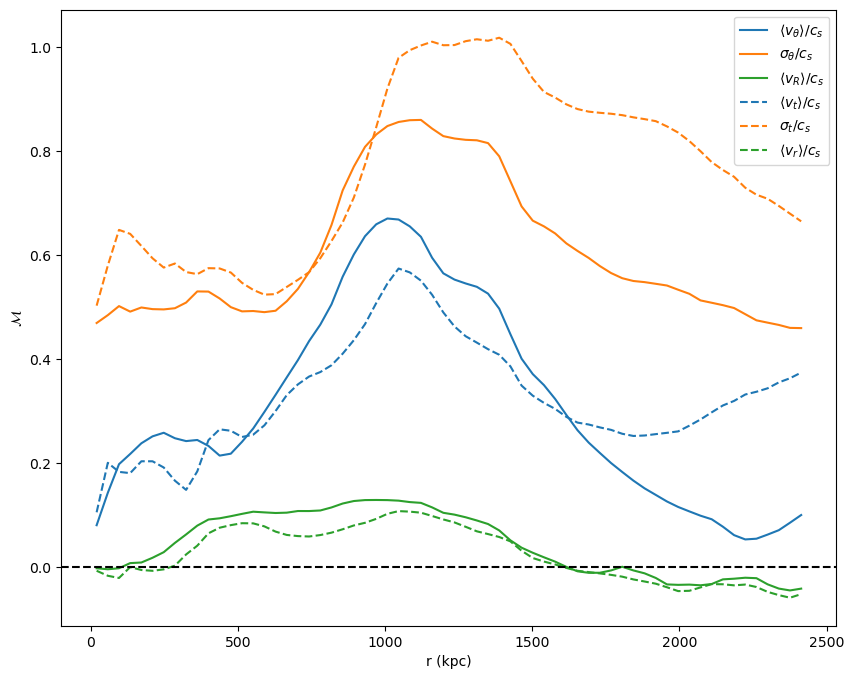

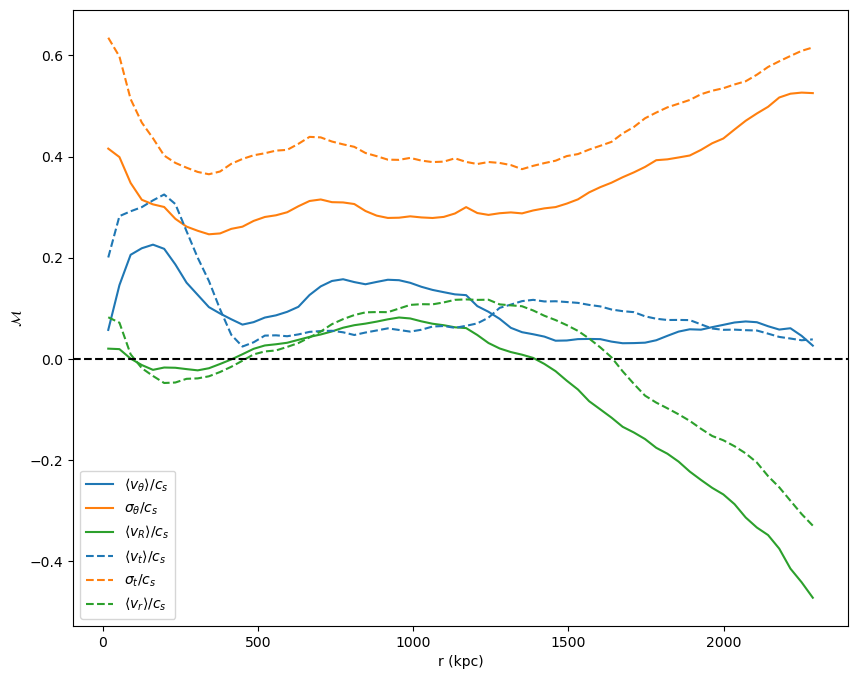

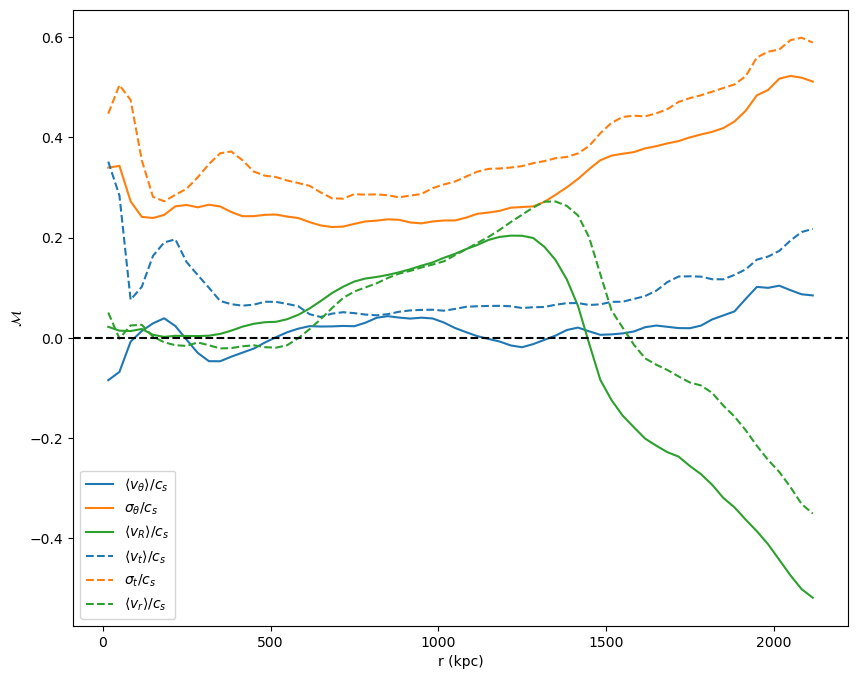

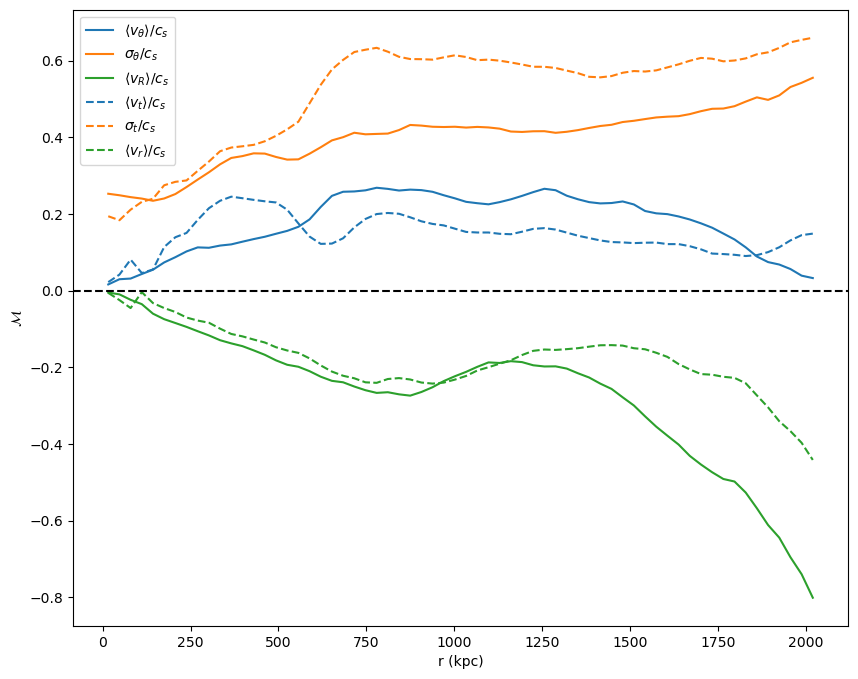

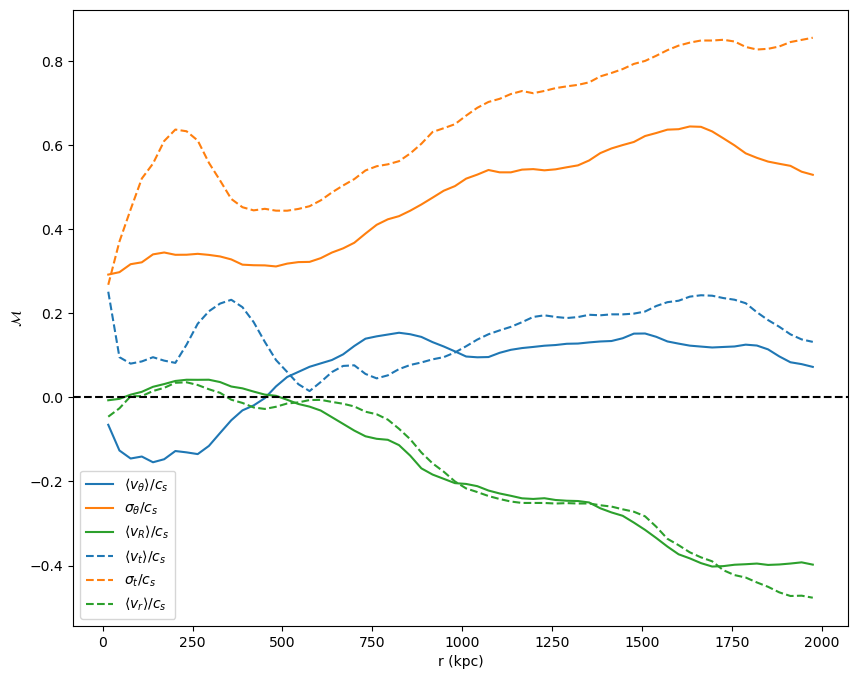

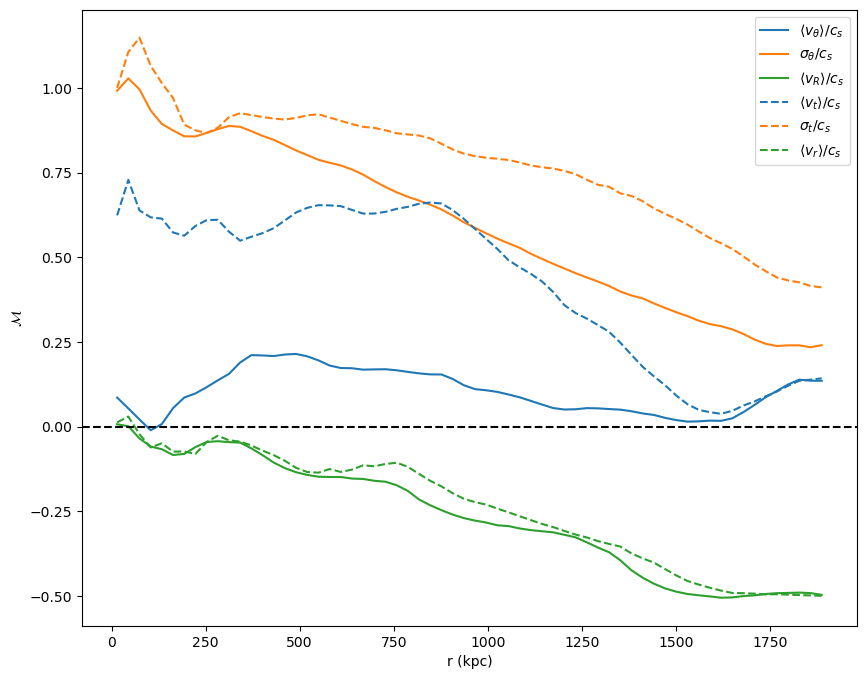

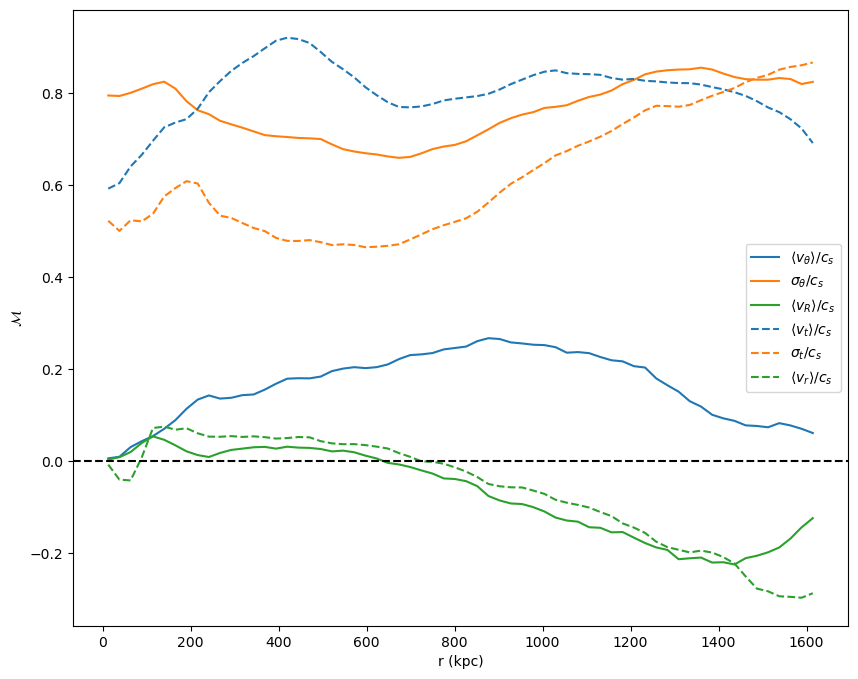

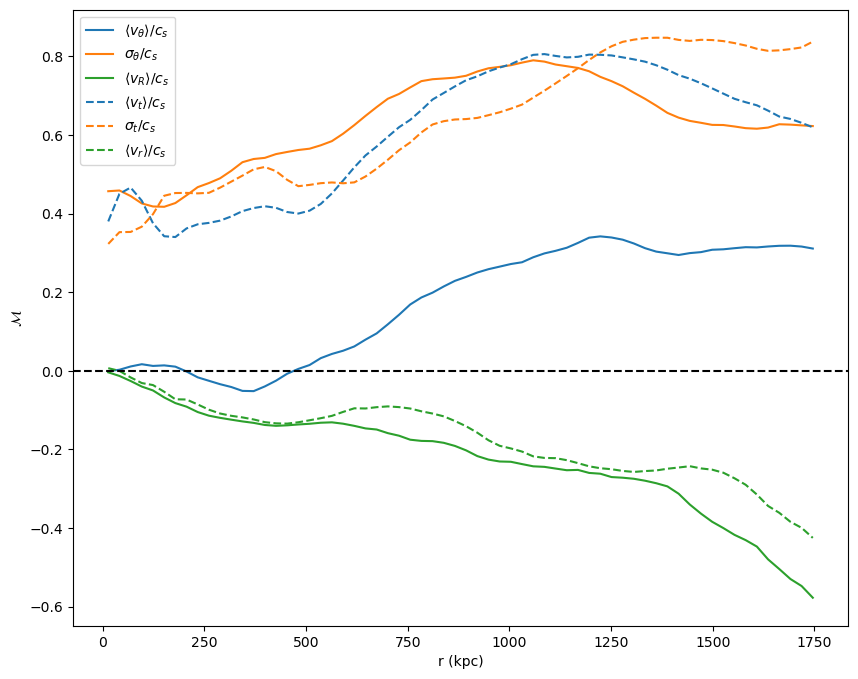

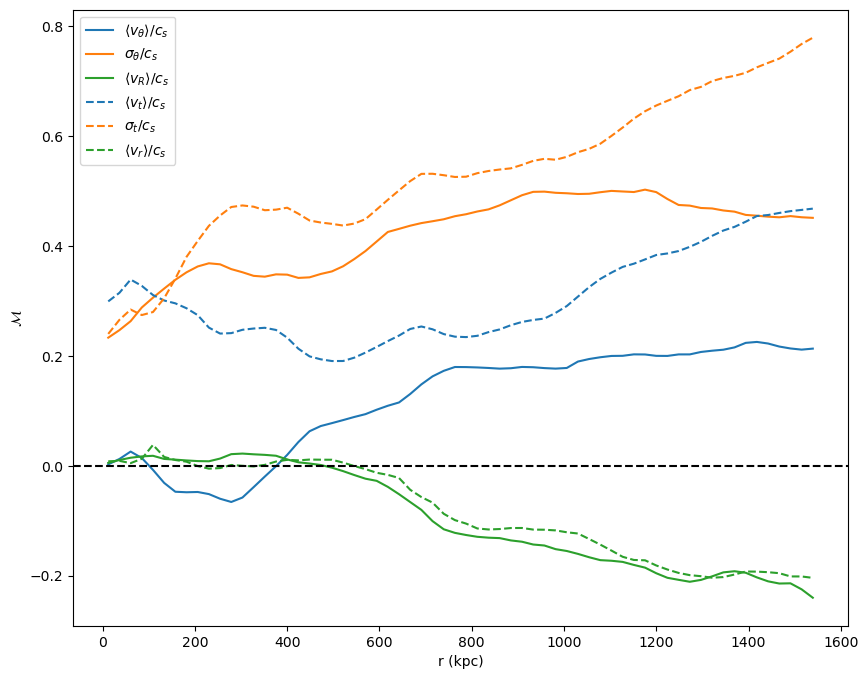

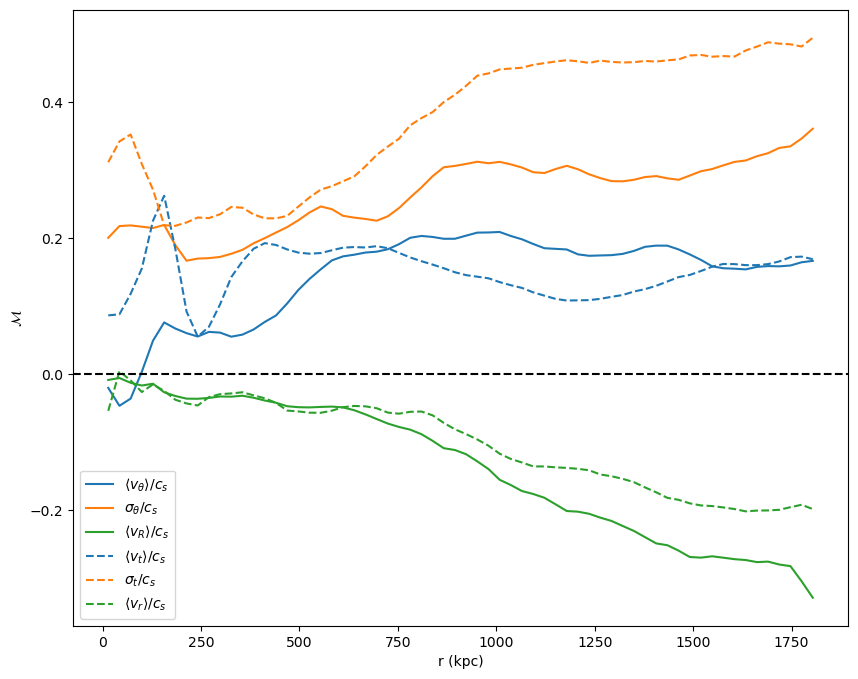

In [3]:
halo_ids = np.arange(10)
print(halo_ids)

for halo_id in halo_ids:
    t_sph_read = QTable.read(f"halo_{halo_id}_vcurve_sph.fits")
    t_cyl_read = QTable.read(f"halo_{halo_id}_vcurve_cyl.fits")
    cs_cyl = t_cyl_read["sound_speed"]
    cs_sph = t_sph_read["sound_speed"]

    fig, ax = plt.subplots(figsize=(10, 8))

    # cylindrical profiles
    ax.plot(
        t_cyl_read["cylindrical_radius"],
        t_cyl_read["velocity_cylindrical_theta"] / cs_cyl,
        label=r"$\langle{v_\theta}\rangle/c_s$",
        color="C0",
    )
    ax.plot(
        t_cyl_read["cylindrical_radius"],
        t_cyl_read["velocity_cylindrical_theta_stddev"].to("km/s") / cs_cyl,
        label=r"$\sigma_\theta/c_s$",
        color="C1",
    )
    ax.plot(
        t_cyl_read["cylindrical_radius"],
        t_cyl_read["velocity_cylindrical_radius"] / cs_cyl,
        label=r"$\langle{v_R}\rangle/c_s$",
        color="C2",
    )

    # spherical profiles
    v_tan = np.sqrt(
        t_sph_read["velocity_spherical_theta"] ** 2
        + t_sph_read["velocity_spherical_phi"] ** 2
    )
    sigma_tan = np.sqrt(
        t_sph_read["velocity_spherical_theta_stddev"] ** 2
        + t_sph_read["velocity_spherical_phi_stddev"] ** 2
    ).to("km/s")

    ax.plot(
        t_sph_read["radius"],
        v_tan / cs_sph,
        label=r"$\langle{v_t}\rangle/c_s$",
        color="C0",
        ls="--",
    )
    ax.plot(
        t_sph_read["radius"],
        sigma_tan / cs_sph,
        label=r"$\sigma_t/c_s$",
        color="C1",
        ls="--",
    )
    ax.plot(
        t_sph_read["radius"],
        t_sph_read["velocity_spherical_radius"] / cs_sph,
        label=r"$\langle{v_r}\rangle/c_s$",
        color="C2",
        ls="--",
    )

    ax.legend()
    ax.axhline(0.0, color="k", ls="--")
    ax.set_xlabel("r (kpc)")
    ax.set_ylabel(r"${\cal M}$")
    fig.savefig(f"halo_{halo_id}_profiles_L.pdf")